In [29]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

#from sklearn import OneHotEncoder

# per importare cose nella folder precedente da ora in poi
import sys
sys.path.append('../')

from layer import HiddenLayer
from activations import *
from losses import *
from network import Network
from regularizers import *
from utils import *

random.seed(42)
np.random.seed(42)

# Progress bar
from tqdm import tqdm
import time

In [30]:
X_train, X_test, y_train, y_test = read_monk(train_path='../data/monk/monks-3.train', test_path='../data/monk/monks-3.test')

In [31]:
np.random.seed(3)
net = Network(MSE(1))

net.add_layer(
    input_size=len(X_train[0]),
    units_size=5,
    starting=Range_random(),
    regularizer=L2(lambda_=10e-4),
    activation=ReLU(),
    momentum=('Standard',1e-2)
)
net.add_layer(
    input_size=5,
    units_size=1,
    starting=Range_random(),
    activation=Sigmoid(),
    momentum=('Standard',1e-2)
)

Epochs:   0%|          | 0/3500 [00:00<?, ?it/s]

Epochs:  41%|████      | 1427/3500 [00:39<00:58, 35.73it/s]


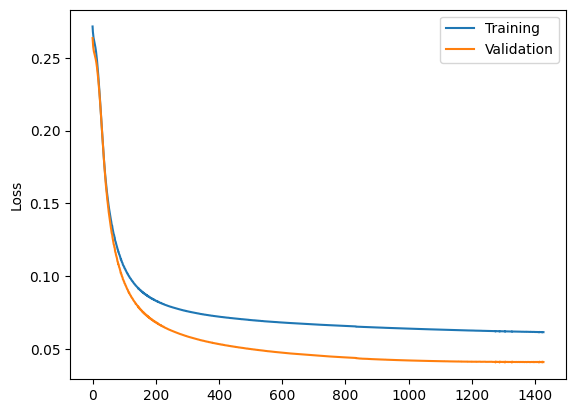

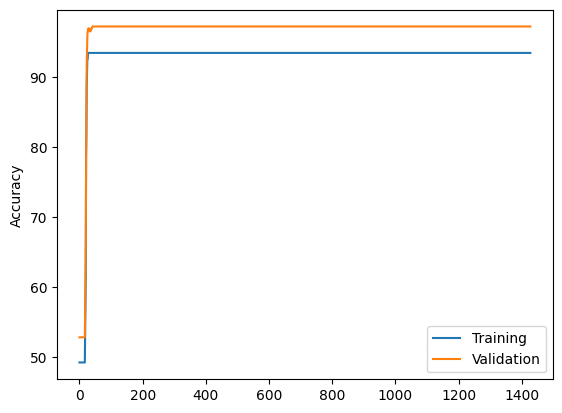

97.22222222222221


In [33]:
statistics = net.train(X_train=X_train, y_train=y_train, X_val=X_test, y_val=y_test, epochs=3500, eta=1e-4, patience=100)

plt.plot(statistics['tr_losses'], label='Training')
plt.plot(statistics['val_losses'], label='Validation')
plt.legend()
plt.ylabel('Loss')
plt.show()

plt.plot(statistics['tr_accuracies'], label='Training')
plt.plot(statistics['val_accuracies'], label='Validation')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

print(statistics['val_accuracies'][-1])

In [6]:
from validation import kfold_crossval

In [3]:
X_train, X_test, y_train, y_test = read_monk(train_path='./data/monk/monks-3.train', test_path='./data/monk/monks-3.test')

In [4]:
n_units = [3,3]
kfold_crossval(
    X=X_train,
    y=y_train,
    k=5,
    n_layers=3,
    n_units=n_units,
    output_size=1,
    starting=Range_random(),
    loss=MSE(1),
    regularizer=L2(lambda_=10e-4),
    momentum=('Nesterov', 10e-4),
    eta=10e-4,
    epochs=1000,
    seed=1,
)

In [2]:
for i in tqdm(range(10000), desc="Status", colour="yellow"):
    pass

Status: 100%|██████████| 10000/10000 [00:00<00:00, 3343140.44it/s]


In [3]:
with tqdm(total=100, colour='yellow') as pbar:
    for i in range(10):
        time.sleep(0.1)
        pbar.update(10)

100%|██████████| 100/100 [00:01<00:00, 90.70it/s]


## Additional Variable Information
    1. class: 0, 1 
    2. a1:    1, 2, 3
    3. a2:    1, 2, 3
    4. a3:    1, 2
    5. a4:    1, 2, 3
    6. a5:    1, 2, 3, 4
    7. a6:    1, 2
    8. Id:    (A unique symbol for each instance)

In [4]:
X_train, X_test, y_train, y_test = read_monk(train_path='./data/monk/monks-3.train', test_path='./data/monk/monks-3.test')

In [5]:
np.random.seed(3)
net = Network(MSE(1))

net.add_layer(
    input_size=len(X_train[0]),
    units_size=5,
    starting=Range_random(),
    regularizer=L2(lambda_=10e-4),
    activation=ReLU(),
    momentum=('Standard',1e-2)
)
net.add_layer(
    input_size=5,
    units_size=1,
    starting=Range_random(),
    activation=Sigmoid(),
    momentum=('Standard',1e-2)
)

 epochs=2500, eta=1e-4, momentum=('Standard',1e-2), units_size=3,  esce da minimo locale 91.666666666666666666 monk1

# with 4000 epochs we won!!!!!!!!!!!!!!!!!!!!!!!!!!!



mmmmmmmm without momentum it's broken, check it

monk 2 with 4 units, epochs=2000, eta=1e-3, see difference beetween momentum=('Standard',1e-2) and no momentum!!!!!!!!!!!!!!!!!!!!!!!!

Epochs: 100%|██████████| 2000/2000 [00:35<00:00, 55.96it/s]


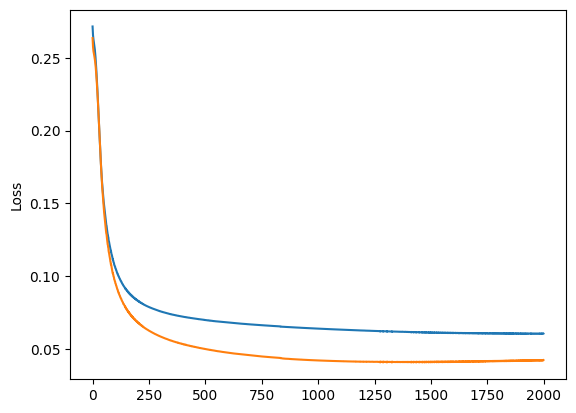

KeyError: 'tr_accuracy'

In [6]:
statistics = net.train(X_train=X_train, y_train=y_train, X_val=X_test, y_val=y_test, epochs=2000, eta=1e-4)

plt.plot(statistics['tr_losses'], label='Training')
plt.plot(statistics['val_losses'], label='Validation')
plt.legend()
plt.ylabel('Loss')
plt.show()

plt.plot(statistics['tr_accuracies'], label='Training')
plt.plot(statistics['val_accuracies'], label='Validation')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

print(statistics['val_accuracy'][-1])

# plotting the acc over epochs

In [5]:
np.random.seed(42)
net = Network(MSE(1))

net.add_layer(input_size=len(X_train[0]), units_size=4, starting=Fan_in(), activation=ReLU())
net.add_layer(input_size=4, units_size=1, starting=Range_random(), activation=Sigmoid())
accs = []

In [6]:
plt.plot(net.train(X_train=X_train, y_train=y_train, epochs=2500, eta=0.001))
plt.show()

TypeError: Network.train() missing 2 required positional arguments: 'X_test' and 'y_test'

In [ ]:
def acc():
    y_pred = []
    for i in range(len(X_test)):
        out = net.forward(X_test[i])
        y_pred.append(out)

    y_pred = np.array(y_pred)

    y_pred = y_pred.reshape(len(y_pred), 1)
    y_test1 = y_test.copy()
    y_test1 = y_test1.reshape(len(y_test1), 1)

    for i in range(len(y_pred)):
        if y_pred[i] > 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0

    # check the accuracy in percentage
    accuracy = np.sum(y_pred == y_test1) / len(y_test1) * 100
    accs.append(accuracy)
    
    #print("Accuracy of the model is: ", accuracy, "%")

In [ ]:
# loop over all the training set
losses = []
for i in range(100):
    loss_sum = 0
    for i in range(len(X_train)):
        out = net.forward(X_train[i])
        loss = net.loss.forward(y_pred=out, y_true=y_train[i])
        net.backward(net.loss.backward(y_pred=out, y_true=y_train[i]))
        loss_sum += loss
    losses.append(loss_sum / len(X_train))
    acc()
        
# plot the loss and accuracy
plt.plot(losses)
plt.show()
plt.plot(accs)
plt.show()


In [4]:
np.random.seed(42)
net = Network(MSE(1))

net.add_layer(input_size=len(X_train[0]), units_size=4, starting=Fan_in(), activation=ReLU())
net.add_layer(input_size=4, units_size=1, starting=Range_random(), activation=Sigmoid())

print(net.layers[0])
print(net.layers[1])


Hidden layer of 4 units.

Input size: 17
Starting: Fan-in in range [-0.5, 0.5]
Activation: ReLU
Regularizer: None
Momentum: None with alpha 0

W = 
[[-0.06085698  0.21862855  0.11253359  0.04785639]
 [-0.16685547 -0.16686717 -0.21436093  0.17762152]
 [ 0.04904799  0.10093003 -0.23255068  0.22793976]
 [ 0.16125837 -0.13953603 -0.15433756 -0.15357137]
 [-0.09495646  0.01200863 -0.03301151 -0.10126874]
 [ 0.05425662 -0.17487116 -0.10082466 -0.06482403]
 [-0.02130919  0.13833066 -0.14567961  0.00690472]
 [ 0.04482765 -0.22000387  0.05216692 -0.15981928]
 [-0.21098097  0.21774147  0.22586471  0.14959469]
 [-0.09477624 -0.19515769  0.08936614 -0.0290303 ]
 [-0.18333839 -0.00233954 -0.22585474  0.19854956]
 [-0.1170089   0.07883489 -0.09133354  0.00973442]
 [ 0.02265781 -0.15286804  0.227782    0.13345902]
 [ 0.2131883   0.1915194   0.04748847  0.20463906]
 [-0.19961046 -0.14746997 -0.22059717 -0.08472723]
 [-0.05399945 -0.11091201  0.15946111 -0.06948484]
 [-0.10626237  0.02071064 -0.1741773

In [9]:

net.reset()
print(net.layers[0])
print(net.layers[1])

Hidden layer of 4 units.

Input size: 17
Starting: Fan-in in range [-0.5, 0.5]
Activation: ReLU
Regularizer: None
Momentum: None with alpha 0

W = 
[[-0.06085698  0.21862855  0.11253359  0.04785639]
 [-0.16685547 -0.16686717 -0.21436093  0.17762152]
 [ 0.04904799  0.10093003 -0.23255068  0.22793976]
 [ 0.16125837 -0.13953603 -0.15433756 -0.15357137]
 [-0.09495646  0.01200863 -0.03301151 -0.10126874]
 [ 0.05425662 -0.17487116 -0.10082466 -0.06482403]
 [-0.02130919  0.13833066 -0.14567961  0.00690472]
 [ 0.04482765 -0.22000387  0.05216692 -0.15981928]
 [-0.21098097  0.21774147  0.22586471  0.14959469]
 [-0.09477624 -0.19515769  0.08936614 -0.0290303 ]
 [-0.18333839 -0.00233954 -0.22585474  0.19854956]
 [-0.1170089   0.07883489 -0.09133354  0.00973442]
 [ 0.02265781 -0.15286804  0.227782    0.13345902]
 [ 0.2131883   0.1915194   0.04748847  0.20463906]
 [-0.19961046 -0.14746997 -0.22059717 -0.08472723]
 [-0.05399945 -0.11091201  0.15946111 -0.06948484]
 [-0.10626237  0.02071064 -0.1741773

# test KFOLD structure

In [8]:
net = create_net(seed=42,
                loss=MSE(1),
                input_size=17, 
                num_layer=2, 
                layers_size=[5,1],
                starting=[Range_random(), Range_random()],
                activations=[ReLU(),Sigmoid()],
                regularizers=[L2(lambda_=10e-4),None],
                momentums=[('Standard',1e-2),('Standard',1e-2)],
                eta=0.1,
                )



In [22]:
len(net.layers)
for i in net.layers:
    print(i.units_size)

l1 = [1, 2]
l1.insert(0, 0)
l1

5
1


[0, 1, 2]

In [10]:
print(net.layers[0])
print(net.layers[1])

Hidden layer of 5 units.

Input size: 17
Starting: Random uniform in range [-0.5, 0.5]
Activation: ReLU
Regularizer: L2 with lambda 0.001
Momentum: Standard with alpha 0.01

W = 
[[-0.12545988  0.45071431  0.23199394  0.09865848 -0.34398136]
 [-0.34400548 -0.44191639  0.36617615  0.10111501  0.20807258]
 [-0.47941551  0.46990985  0.33244264 -0.28766089 -0.31817503]
 [-0.31659549 -0.19575776  0.02475643 -0.06805498 -0.20877086]
 [ 0.11185289 -0.36050614 -0.20785535 -0.13363816 -0.04393002]
 [ 0.28517596 -0.30032622  0.01423444  0.09241457 -0.45354959]
 [ 0.10754485 -0.32947588 -0.43494841  0.44888554  0.46563203]
 [ 0.30839735 -0.19538623 -0.40232789  0.18423303 -0.05984751]
 [-0.37796177 -0.00482309 -0.46561148  0.4093204  -0.24122002]
 [ 0.16252228 -0.18828892  0.02006802  0.04671028 -0.31514554]
 [ 0.46958463  0.27513282  0.43949894  0.39482735  0.09789998]
 [ 0.42187424 -0.4115075  -0.30401714 -0.45477271 -0.17466967]
 [-0.11132271 -0.22865097  0.32873751 -0.14324667 -0.21906549]
 [

In [3]:
# recreate the net to check if seed reset works
net = create_net(seed=42,
                loss=MSE(1),
                input_size=17, 
                num_layer=2, 
                layers_size=[5,1],
                starting=[Range_random(), Range_random()],
                activations=[ReLU(),Sigmoid()],
                regularizers=[L2(lambda_=10e-4),None],
                momentums=[('Standard',1e-2),('Standard',1e-2)],
                eta=0.1,
                )

print(net.layers[0])
print(net.layers[1])



NameError: name 'create_net' is not defined

# it work!!!!!!

Epochs:  40%|███▉      | 1392/3500 [00:33<00:50, 41.55it/s]


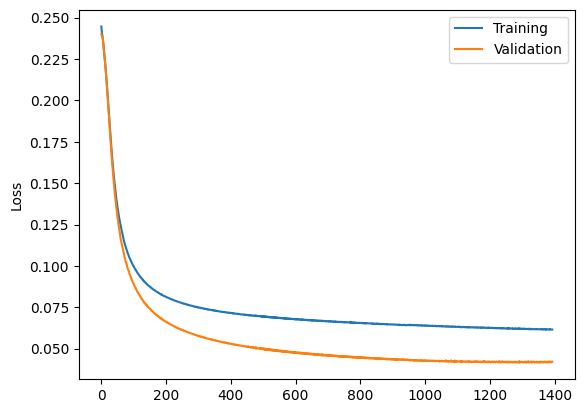

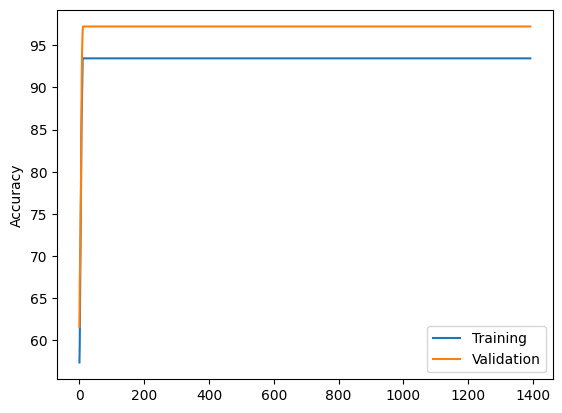

97.22222222222221


In [13]:
# train to check if everything OK
statistics = net.train(X_train=X_train, y_train=y_train, X_val=X_test, y_val=y_test, epochs=3500, eta=1e-4, patience=100)
plt.plot(statistics['tr_losses'], label='Training')
plt.plot(statistics['val_losses'], label='Validation')
plt.legend()
plt.ylabel('Loss')
plt.show()

plt.plot(statistics['tr_accuracies'], label='Training')
plt.plot(statistics['val_accuracies'], label='Validation')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

print(statistics['val_accuracies'][-1])

# now we pass the object or we CREATE the object in the kfold function???

In [16]:
regularizers = ["L1", "L2"]
regularizers_lambda = [10e-4, 10e-3]

regularizers = [eval(regularizers[i])(lambda_=regularizers_lambda[i]) for i in range(len(regularizers))]

for i in regularizers:
    print(i)

L1 with lambda 0.001
L2 with lambda 0.01


In [7]:
# recreate the net to check by passing strings, not obects
net = create_all_net(seed=42,
                loss="MSE",
                batch_size=1,
                input_size=17, 
                num_layer=2, 
                layers_size=[5,1],
                starting=["Range_random", "Range_random"],
                starting_range=[(-0.5,0.5), (-0.5,0.5)],
                activations=["ReLU","Sigmoid"],
                regularizers=["L2","L1"],
                regularizers_lambda=[10e-4,10e-3],
                momentums=[('Standard',1e-2),('Standard',1e-2)],
                eta=0.1,
                )

print(net.layers[0])
print(net.layers[1])

Hidden layer of 5 units.

Input size: 17
Starting: Random uniform in range [-0.5, 0.5]
Activation: ReLU
Regularizer: L2 with lambda 0.001
Momentum: Standard with alpha 0.01

W = 
[[-0.12545988  0.45071431  0.23199394  0.09865848 -0.34398136]
 [-0.34400548 -0.44191639  0.36617615  0.10111501  0.20807258]
 [-0.47941551  0.46990985  0.33244264 -0.28766089 -0.31817503]
 [-0.31659549 -0.19575776  0.02475643 -0.06805498 -0.20877086]
 [ 0.11185289 -0.36050614 -0.20785535 -0.13363816 -0.04393002]
 [ 0.28517596 -0.30032622  0.01423444  0.09241457 -0.45354959]
 [ 0.10754485 -0.32947588 -0.43494841  0.44888554  0.46563203]
 [ 0.30839735 -0.19538623 -0.40232789  0.18423303 -0.05984751]
 [-0.37796177 -0.00482309 -0.46561148  0.4093204  -0.24122002]
 [ 0.16252228 -0.18828892  0.02006802  0.04671028 -0.31514554]
 [ 0.46958463  0.27513282  0.43949894  0.39482735  0.09789998]
 [ 0.42187424 -0.4115075  -0.30401714 -0.45477271 -0.17466967]
 [-0.11132271 -0.22865097  0.32873751 -0.14324667 -0.21906549]
 [

questo ovviamente non va bene, noi era solo per vedere come creare combinazioni di cose

In [11]:
import itertools

# define the hyperparameters
losses = ["MSE"]
#batch_sizes = [1, 10]
layers_sizes = [[5,1], [10,1]]
startings = ["Range_random", "Fan_in"]

activations = ["ReLU", "Sigmoid"]

regularizers = ["L2", "L1"]
regularizers_lambda = [10e-4, 10e-3]
momentums = [('Standard',1e-2),('Standard',1e-2)]
etas = [0.1, 0.01]

# create a list of all the possible combinations
hyperparameters = [losses, layers_sizes, startings, activations, regularizers, regularizers_lambda, momentums, etas]
hyperparameters = list(itertools.product(*hyperparameters))

len(hyperparameters)




128

In [24]:
X_train, X_test, y_train = read_cup(train_path='./data/cup/ML-CUP19-TR.csv', test_path='./data/cup/ML-CUP19-TS.csv')

NameError: name 'read_cup' is not defined